##**Άσκηση 1 a)**

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

#import iris dataset
dataset = load_iris()
samples = dataset.data
labels = dataset.target

X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size = 0.2,random_state = 33)

##**Άσκηση 1 b)**

In [10]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

#define train and test set
train_set = TensorDataset(torch.FloatTensor(X_train),torch.LongTensor(y_train))
test_set = TensorDataset(torch.FloatTensor(X_test),torch.LongTensor(y_test))

train_dataloader = DataLoader(train_set,batch_size=120)
test_dataloader = DataLoader(test_set,batch_size=30)

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(4, 30),
            nn.Sigmoid(),
            nn.Linear(30, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

model = NeuralNetwork()

In [12]:
params = list(model.parameters())
print("Number of learnable parameters' sets: " , len(params))
for i in params:
    print(i.size())

Number of learnable parameters' sets:  4
torch.Size([30, 4])
torch.Size([30])
torch.Size([3, 30])
torch.Size([3])


In [8]:
learning_rate = 1e-1

# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"loss: {loss:>7f}")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    correct_list.append(correct)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct_list

In [ ]:
epochs = 60
correct_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.103444
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.124634 

Epoch 2
-------------------------------
loss: 1.093664
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.112740 

Epoch 3
-------------------------------
loss: 1.086684
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.103818 

Epoch 4
-------------------------------
loss: 1.080723
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.096514 

Epoch 5
-------------------------------
loss: 1.075159
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.090150 

Epoch 6
-------------------------------
loss: 1.069763
Test Error: 
 Accuracy: 30.0%, Avg loss: 1.084354 

Epoch 7
-------------------------------
loss: 1.064445
Test Error: 
 Accuracy: 40.0%, Avg loss: 1.078907 

Epoch 8
-------------------------------
loss: 1.059169
Test Error: 
 Accuracy: 50.0%, Avg loss: 1.073679 

Epoch 9
-------------------------------
loss: 1.053913
Test Error: 
 Accuracy: 53.3%, Avg loss: 1.068586 

Epoch 10
----------------------------

##**Άσκηση 1 c)**

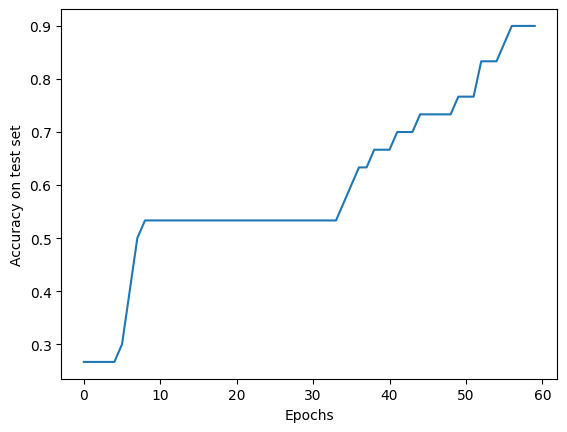

In [ ]:
plt.plot(correct_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy on test set")
plt.show()

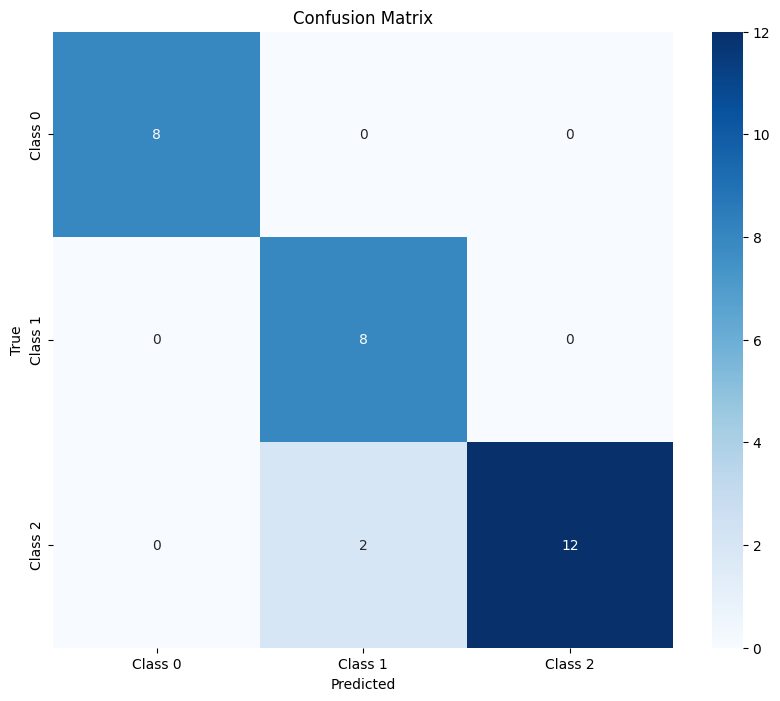

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

#calculate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

#plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i}" for i in range(3)],
            yticklabels=[f"Class {i}" for i in range(3)])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

##**Άσκηση 1 d)**

In [ ]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super(NeuralNetwork2, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(4, 30),
            nn.ReLU(),
            nn.Linear(30, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

model2 = NeuralNetwork2()

In [ ]:
learning_rate2 = 1e-2
# Initialize the loss function
loss_fn2 = nn.CrossEntropyLoss()

optimizer2 = torch.optim.SGD(model2.parameters(), lr=learning_rate2)

In [ ]:
epochs = 60
correct_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model2, loss_fn2, optimizer2)
    test_loop(test_dataloader, model2, loss_fn2)
print("Done!")

Epoch 1
-------------------------------
loss: 1.225429
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.220585 

Epoch 2
-------------------------------
loss: 1.183011
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.170642 

Epoch 3
-------------------------------
loss: 1.147614
Test Error: 
 Accuracy: 30.0%, Avg loss: 1.128690 

Epoch 4
-------------------------------
loss: 1.117673
Test Error: 
 Accuracy: 40.0%, Avg loss: 1.093166 

Epoch 5
-------------------------------
loss: 1.091978
Test Error: 
 Accuracy: 43.3%, Avg loss: 1.062914 

Epoch 6
-------------------------------
loss: 1.069609
Test Error: 
 Accuracy: 66.7%, Avg loss: 1.036954 

Epoch 7
-------------------------------
loss: 1.049914
Test Error: 
 Accuracy: 70.0%, Avg loss: 1.014655 

Epoch 8
-------------------------------
loss: 1.032437
Test Error: 
 Accuracy: 73.3%, Avg loss: 0.995117 

Epoch 9
-------------------------------
loss: 1.016701
Test Error: 
 Accuracy: 73.3%, Avg loss: 0.977787 

Epoch 10
----------------------------

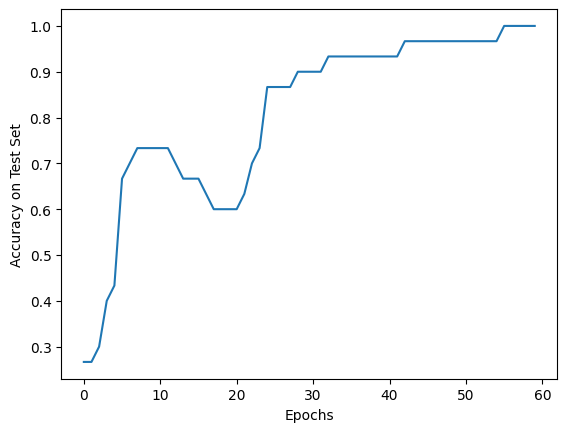

In [ ]:
plt.plot(correct_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy on Test Set")
plt.show()

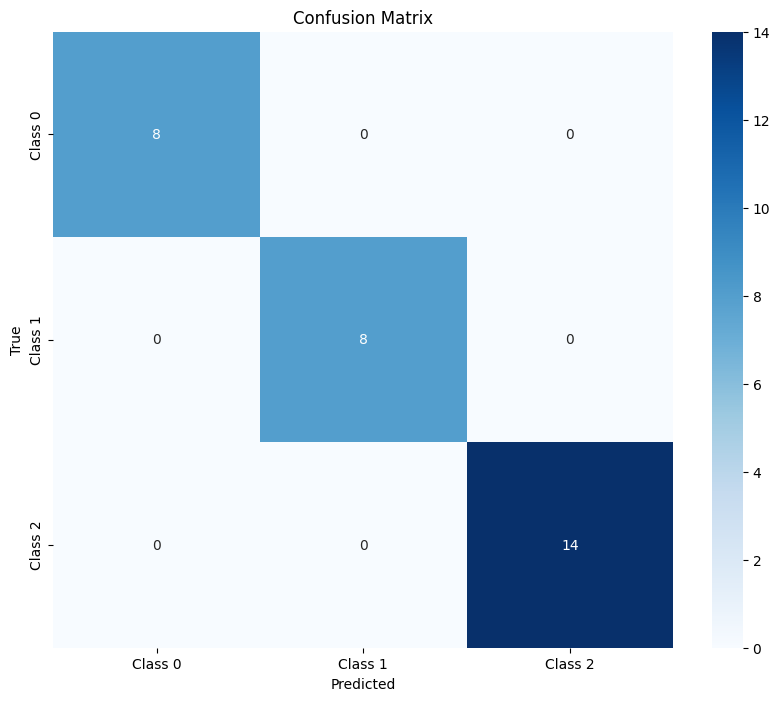

In [ ]:
model2.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model2(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

#calculate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

#plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i}" for i in range(3)],
            yticklabels=[f"Class {i}" for i in range(3)])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

##**Άσκηση 1 e)**

In [24]:
class NeuralNetwork3(nn.Module):
    def __init__(self):
        super(NeuralNetwork3, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(4, 50),
            nn.ReLU(),
            nn.Linear(50, 30),
            nn.ReLU(),
            nn.Linear(30, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits


model3 = NeuralNetwork3()

In [25]:
learning_rate3 = 1e-2

# Initialize the loss function
loss_fn3 = nn.CrossEntropyLoss()

optimizer3 = torch.optim.Adam(model3.parameters(), lr=learning_rate3)

In [26]:
epochs = 60
correct_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model3, loss_fn3, optimizer3)
    test_loop(test_dataloader, model3, loss_fn3)
print("Done!")

Epoch 1
-------------------------------
loss: 1.121857
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.088763 

Epoch 2
-------------------------------
loss: 1.075224
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.015498 

Epoch 3
-------------------------------
loss: 1.023188
Test Error: 
 Accuracy: 46.7%, Avg loss: 0.924177 

Epoch 4
-------------------------------
loss: 0.963460
Test Error: 
 Accuracy: 73.3%, Avg loss: 0.860321 

Epoch 5
-------------------------------
loss: 0.914040
Test Error: 
 Accuracy: 73.3%, Avg loss: 0.811434 

Epoch 6
-------------------------------
loss: 0.861489
Test Error: 
 Accuracy: 73.3%, Avg loss: 0.765627 

Epoch 7
-------------------------------
loss: 0.801213
Test Error: 
 Accuracy: 73.3%, Avg loss: 0.719126 

Epoch 8
-------------------------------
loss: 0.739180
Test Error: 
 Accuracy: 73.3%, Avg loss: 0.672275 

Epoch 9
-------------------------------
loss: 0.670071
Test Error: 
 Accuracy: 86.7%, Avg loss: 0.618533 

Epoch 10
----------------------------

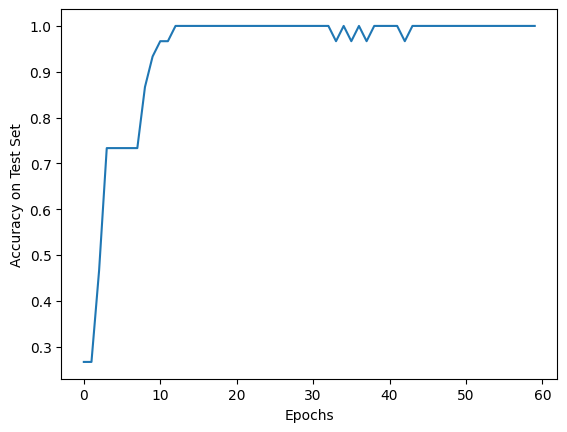

In [27]:
plt.plot(correct_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy on Test Set")
plt.show()

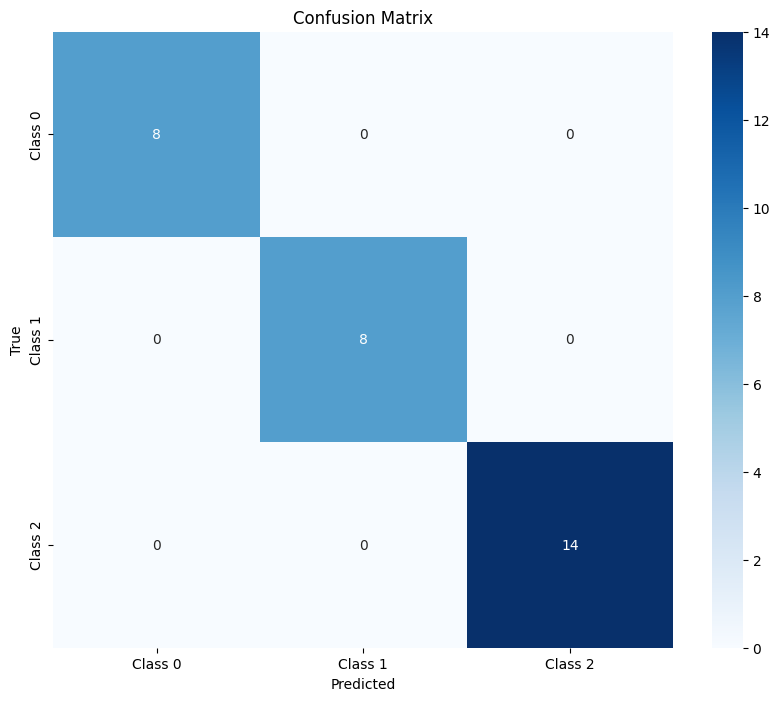

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

model3.eval()

all_preds = []
all_labels = []

#find predictions that model returns using test data
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model3(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

#calculate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

#plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i}" for i in range(3)],
            yticklabels=[f"Class {i}" for i in range(3)])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

##**Άσκηση 1 f)**

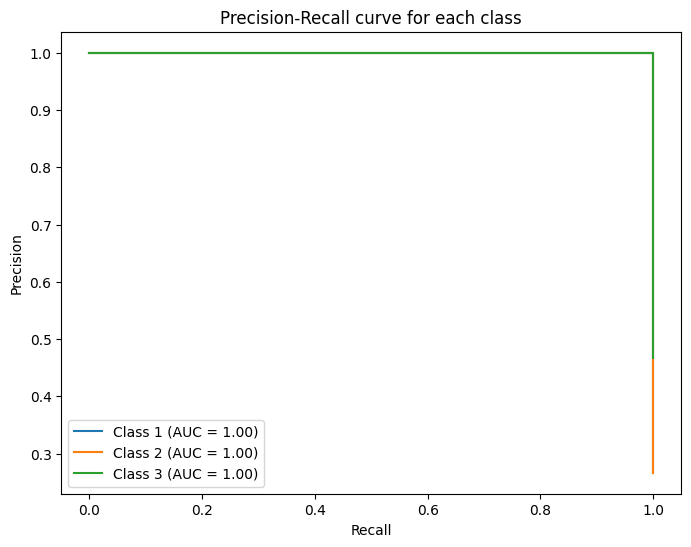

In [29]:
from sklearn.metrics import precision_recall_curve, auc
import torch.nn.functional as F

#set the model to evaluation mode
model3.eval()

#create lists to store labels and predictions
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model3(inputs)
        #transform the output into probabilities
        probs = F.softmax(outputs, dim=1)
        all_predictions.extend(probs.numpy())
        all_labels.extend(labels.numpy())

#convert predictions and labels to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

#plot precision - recall curves for each class
precision = []
recall = []
auc_scores = []

#calculate precision and recall for each class
for i in range(3):
    prec, rec, _ = precision_recall_curve((all_labels == i).astype(int), all_predictions[:, i])
    precision.append(prec)
    recall.append(rec)
    auc_scores.append(auc(recall[i], precision[i]))

#plot the precision - recall curves
plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(recall[i], precision[i], label=f'Class {i+1} (AUC = {auc_scores[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for each class')
plt.legend()
plt.show()